In [1]:
from matplotlib import pyplot as plt

from loki.libloki.configs import PulsarSearchConfig
from loki.search import ffa_search
from pyloki.simulation.pulse import PulseSignalConfig


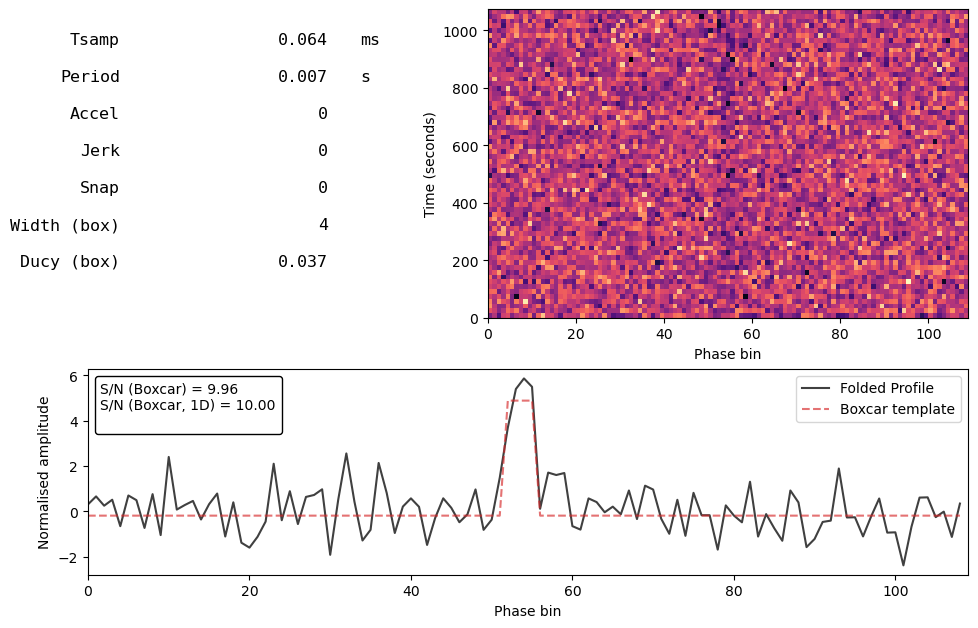

In [2]:
pulsar_period = 0.007  # (s)
dt = 64e-6
nsamps = 2**24
cfg = PulseSignalConfig(
    period=pulsar_period,
    dt=dt,
    snr=10,
    ducy=0.05,
    nsamps=nsamps,
    ds=1,
)
tim_data = cfg.generate(shape="gaussian")
fig = tim_data.plot_fold(cfg.freq, cfg.fold_bins)
plt.show()

In [3]:
eta = 1
nbins = 64
param_limits = [(1 / 0.0075, 1 / 0.0065)]
bseg_brute = cfg.nsamps // 16384
search_cfg = PulsarSearchConfig(
    nsamps=cfg.nsamps,
    tsamp=cfg.dt,
    nbins=nbins,
    eta=eta,
    param_limits=param_limits,
    bseg_brute=bseg_brute,
    ducy_max=0.2,
    wtsp=1.5,
    nthreads=8,
    use_fourier=False,
)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

[2026-01-07 20:50:54.211] [info] FFA Memory Usage: 1.34 GB + 0.02 GB (coords)
[2026-01-07 20:50:54.281] [info] FFA::execute started
[2026-01-07 20:50:54.314] [info] FFA::initialize started
[2026-01-07 20:50:54.444] [info] FFA::initialize took 129 ms
[2026-01-07 20:50:54.688] [info] FFA::execute took 407 ms


In [4]:
print(pgram.get_indices_summary(true_values={"freq": cfg.freq}))
print(pgram.get_summary())

True param indices: (654471,)
Best param indices: (np.int64(654472), np.int64(1))
Best S/N: 9.23
Best Period: 0.0069999989559007625
Best freq: 142.85716416529374
Best width: 2


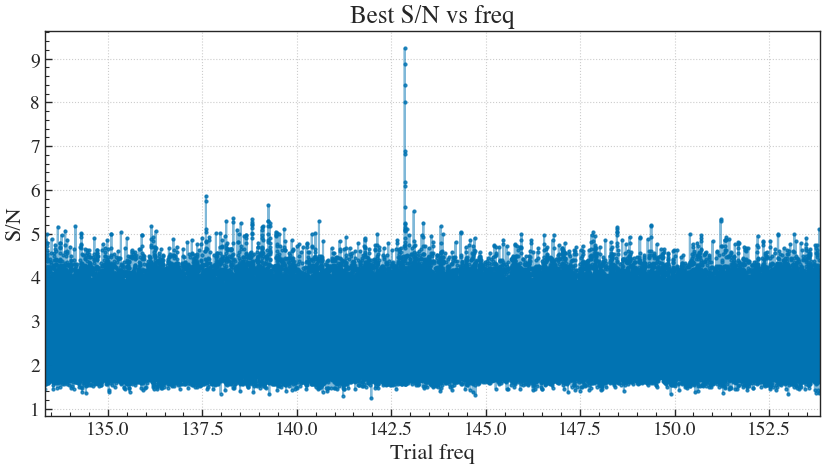

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

### FFT-SHIFT Search

In [6]:
search_cfg = PulsarSearchConfig(
    nsamps=cfg.nsamps,
    tsamp=cfg.dt,
    nbins=nbins,
    eta=eta,
    param_limits=param_limits,
    bseg_brute=bseg_brute,
    ducy_max=0.2,
    wtsp=1.5,
    nthreads=8,
    use_fourier=True,
)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

[2026-01-07 20:52:05.328] [info] FFA Memory Usage: 1.39 GB + 0.02 GB (coords)
[2026-01-07 20:52:05.393] [info] FFA::execute started
[2026-01-07 20:52:05.423] [info] FFA::initialize started
[2026-01-07 20:52:07.712] [info] FFA::initialize took 2288 ms
[2026-01-07 20:52:08.006] [info] FFA::execute took 2613 ms


In [7]:
print(pgram.get_indices_summary(true_values={"freq": cfg.freq}))
print(pgram.get_summary())

True param indices: (654471,)
Best param indices: (np.int64(654471), np.int64(2))
Best S/N: 9.05
Best Period: 0.006999999668944111
Best freq: 142.85714961338581
Best width: 3


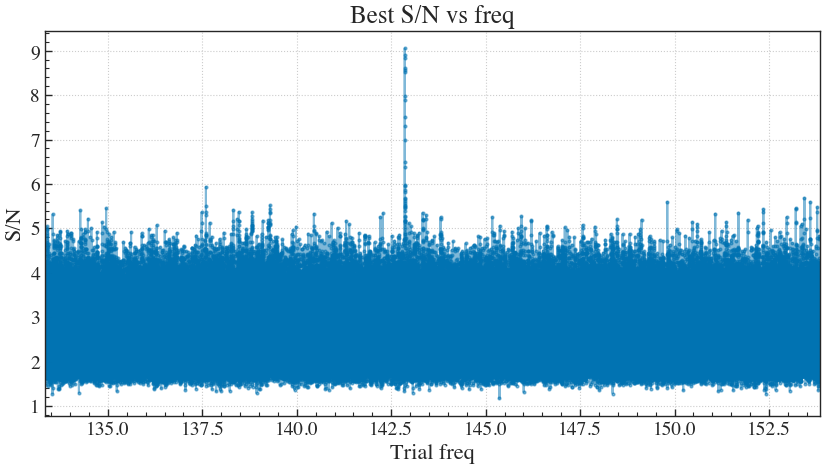

In [8]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()